# A functional Introduction to Property Predictions: Python based machine learning #

### PLEASE FEEL FREE TO EMAIL QUESTIONS TO ME AT KAAIKAUWE@GMAIL.COM ###

In this tutorial we cover the basic steps needed to begin material property based machine learning using python 3.6.. Because I prefer learning from youtube myself, I have created a playlist "A functional Introduction to Property Predictions": https://www.youtube.com/playlist?list=PLawAtY0TtS6u1o_AQNb5eWNXFn_UREl-B to walk you through the code in this tutorial. The Machine learning workshop will be focused on covering Sections 2 and Sections 3 of this tutorial with new data and in more detail. 

## Tutorial Outline ##
_________
### Section 1:  get setup ###
(these steps work for me running windows)
- downloading python 3.6 using the anaconda installation
- installation of extra python packages
- importing packages
- finding documentation
- A few basic functions to know

### Section 2: read in data ###
**_DATA FOR THIS TUTORIAL AND THE WORKSHOP CAN BE FOUND AT:_** https://drive.google.com/open?id=1gAeESVOezMg2NJ_86akryFQBq9vImCd8
- get material data
- processing material data using the pandas package
- visualizing data with the seaborn package
- add formula based features to the data

### Section 3: get predicting ###
- model selection with the scikit-learn package
- how to implement cross-validation
- verification of model performance

______

# Section 1 #

### Download python 3 using the anaconda installation ###

We will be using python 3 for this tutorial. If you do not already have python 3 installed, I recommend downloading python 3 using the Anaconda installation found at https://www.anaconda.com/download/. The Anaconda installation contains the core python 3 installation as well as a collection of additional packages and software that are handy for efficient scientific programming.

Once you have installed python, you can open up Jupyter notebook to try writting a few lines of code. Jupyter is a convinient way to program readable code. You should be able to open jupyter notebook from your list of programs. You can also access the program through the Command Prompt by simple typing "jupyter notebook" without the quotes. This link may help if you are having trouble opening jupyter http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html. 

From here you should try to open up a new python file. The video 'section 1' on the youtube playlist linked above includes the steps of opening jupyter notebook and creating a new python file. 

If you want to play around here, there are a lot of great tutorials to follow to learn the basics of python. TheNewBoston does a particularly wgood tutorial series for beginners. If are interested in learning the basics of python programming, you can start here: https://youtu.be/HBxCHonP6Ro.

### Installation of python packages ###
We will be using a number of python packages to aide us with machine learning. A Python package is collection of python based functions and definitions that can be used in your code. We will take advantage of these to save as much time as possible.

The packages we want to use include:
- **numpy**: handles matrices and arrays 
- **pandas**: used to create dataframes to simplify data processing
- **pymatgen**: the materials project API for python -- used to parse chemical formula information
- **seaborn**: visualize material data during pre-processing
- **matplotlib**: visualize model performance
- **scikit-learn**: machine learning library for data processing and model creation/optimization

Some of these do not come with the anaconda instillation. We can check if a package is installed by running the following lines of code:

In [1]:
import pkg_resources

installed_packages = pkg_resources.working_set
#print(installed_packages)
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
     for i in installed_packages])
#print(installed_packages_list)

necessary_packages = ['numpy',
                 'pandas',
                 'pymatgen',
                 'seaborn',
                 'matplotlib',
                 'scikit-learn',
                 'example-missing-package-FAKE'
                 ]

current_packages = sorted(["%s" % (package.key) for package in installed_packages if package.key in necessary_packages])
current_packages_plus_version = sorted(["%s==%s" % (package.key, package.version) for package in installed_packages if package.key in necessary_packages])
missing_packages = sorted([package for package in necessary_packages if package not in current_packages])

print('You have the current packages installed:')
for package in current_packages_plus_version:
    print('    ' + package)
    
print('\nYou are missing the following package(s):')
for package in missing_packages:
    print('    ' + package)

You have the current packages installed:
    matplotlib==3.0.2
    numpy==1.15.4
    pandas==0.23.4
    pymatgen==2018.9.30
    scikit-learn==0.20.1
    seaborn==0.9.0

You are missing the following package(s):
    example-missing-package


## ___________
We will use the command line CMD, and **pip** to install missing packages. A detailed description for installing python packages and modules can be found here: https://docs.python.org/3/installing/index.html.

In the command line, we can install all of these packages using the format:
```
pip install packagename
```
_*note: if you already had python 2 installed on your computer, use pip3 instead of pip to install packages_
```
pip3 install packagename
```
------
__If you cannot access pip using the command prompt, try opening up the anaconda prompt. Similarly, if pip doesn't work to install pymatgen, you can do the anaconda based install found here: http://pymatgen.org/installation.html__
```
conda install --channel matsci pymatgen
```


You should now have the necessary packages installed and are ready to start coding. The most basics things you will need to know for running materials based machine learning algorithms will be discussed in this tutorial. There is an increadible amount of material that I will not cover. The documentation for each of these packages is worth looking over as you get comfortable with their basic functions. Links to the official documentation are below, however these tend to have a lot of technical jargon. Consider typing questions directly into google; you are more likely to find similar questions answered in simple terms.

- numpy: https://docs.scipy.org/doc/
- pandas: https://pandas.pydata.org/pandas-docs/stable/
- pymatgen: http://pymatgen.org/
- seaborn: https://seaborn.pydata.org/
- matplotlib: https://matplotlib.org/contents.html
- scikit-learn: http://scikit-learn.org/stable/documentation.html

# Section 2 #
- get material data and handle material data using the pandas package
- visualizing data with the seaborn package
- add formula based features to the data

### Handle material data with pandas ###

There are two goals for this section:

1. __read in data__
2. __add features based on chemical formula__

We will start by looking at inorganic heat capacity data taken from the NIST: JANAF tables (https://janaf.nist.gov/). We will need to download this data into the folder that contains this python file. The heat capacity data can be grabbed here: https://drive.google.com/open?id=1gAeESVOezMg2NJ_86akryFQBq9vImCd8

This dataset contains heat capacity data for almost 300 inorganic compounds. We will use this dataset show how formula features are generated, and talk about some data processing choices.

__get heat capacity data into python__  
To handle the heat capacity data, we will take advantage of the packages we have installed. The ```pandas``` package can be used to store information in dataframes that preserve the rows and columns format of a csv or excel sheet. We will import the pandas package with the abreviation 'pd' using the line of code:
```
import pandas as pd
```
This allows us to more succinctly call the pandas package. We will then read in the downloaded csv with pandas (pd) assigning the information in the csv to the variable heat_capacity_dataframe. 

Once the heat capacity data is read into our file, we can quickly visual the data. A fast way to do this is to grab the first few rows of the imported data (now saved as a pandas ```DataFrame```). We can do this using the code:  
```
heat_capacity_dataframe.head()
```
The heat capacity data is saved in a pandas dataframe, because of this, we can access ```pd.DataFrame()``` specific methods. This is performed using the syntax "pd.*DataFrame*().*method*()".  

For us, *heat_capacity_dataframe* is equivalent to *df.DataFrame()*. The *method()* we use is *head()*, and returns the first 5 rows of our data.

In [61]:
import pandas as pd
heat_capacity_dataframe = pd.read_csv('heat_capacity_298K.csv')
heat_capacity_dataframe.head()

,FORMULA,PROPERTY: Heat Capacity (J/mol K)
0,Al1,24.209
1,Al1Br3,100.578
2,Al1Cl1O1,56.902
3,Al1Cl3,91.128
4,Al1Cl4K1,156.482


We can see there are two columns in this data, 'FORMULA' and 'PROPERTY: Heat Capacity (J/mol K)'. We can access the values in a particular column using square brackets and calling the columns name as a string (both quotation marks -- "string" and 'string' -- can be used to denote strings). This lets the python know we want the sequence of letters 'PROPERTY: Heat Capacity (J/mol K)' passed into the function, and not a variable with the same name. This code:
````
heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)']
```
will return a vector contain all the heat capacity vales stored in this column. We can try print that below. To limit the number of elements printed, we will be using the list slice:
```
LIST[0:5]
```
In our example, the variable ```heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)']``` replaces *LIST*, and is sliced to only have the first 5 elements.

In [62]:
sliced_list = heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'][0:5]
print(sliced_list)

0     24.209
1    100.578
2     56.902
3     91.128
4    156.482
Name: PROPERTY: Heat Capacity (J/mol K), dtype: float64


## look at data with seaborn ##

Now that we know how to access the heat capacity data, we can now look at the distribution of the data. Most machine learning algorithms perform best on normalized data. The seaborn package allows us to quickly see the distribution. We will import t

C:\Users\awang\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


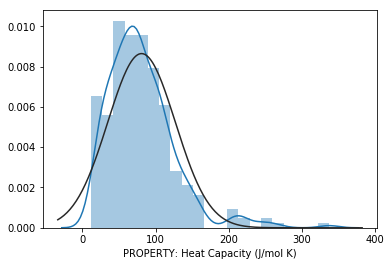

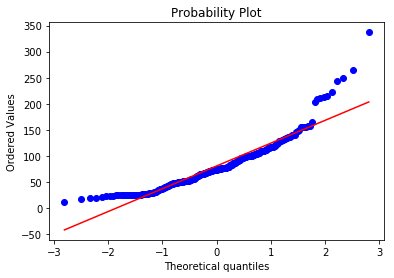

In [63]:
# allows for plots in jupyter notebook
import matplotlib.pyplot as plt
# this seems to be not needed anymore -> % matplotlib inline

import seaborn as sns
# generates the normal curve cosest to our data
from scipy.stats import norm 
from scipy import stats

# make graph to visiualize distribution of heat capacities
sns.distplot(heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'], fit=norm)
fig = plt.figure()
res = stats.probplot(heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'], plot=plt)

Although it is not perfect, we can confimed the data is close to a normal distribution. Perfectly normal data would lie on the red line of the probability plot. A more robust approach could normalize the data to help improve algorithm performance. 

To briefly illustrate this, lets consider a log transformation, which looks appropriate for the distribution of heat capacity values. The numpy package has many built in math functions (including *log*), so we will import that now.

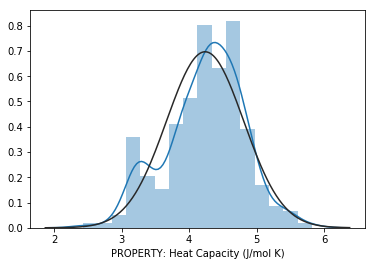

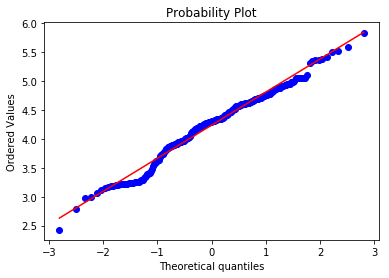

In [64]:
import numpy as np

# here we do a log transformation. this can often help normalize data
log_cp = np.log(heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'])

sns.distplot(log_cp, fit=norm)
fig = plt.figure()
res = stats.probplot(log_cp, plot=plt)

We can see that a log transformation may help us improve the data if we choose to use it.  

For now we will move on to converting the formula into a feature vector (without performing the log transformation).

## make feature vector from formula ##
I have written a function, ```get_features()```, to do this for us. This function uses the materials project API's, which can be accessed through the pymatgen package. The numpy package is also used in this function, which allows us to take advantage of arrays and matrices.  We will import the pymatgen package and define the ```get_features()``` function below. You can notice we define a variable element_data. This contains the elemental information that is used to make the features. Feel free to open up the csv to see what type of information is included.

In [72]:
import pymatgen as mg

element_data = pd.read_csv(r'simple_element_properties.csv', index_col=0)

def get_features(formula):
    '''
    Input
    ----------
    formula: string
        put a valid chemical fomula as a sting. Example( 'NaCl')

    Output
    ----------
    features: np.array()
        This is an 1x252 length array containing feature values for use in the
        machine learning model.
    '''
    try:
        # get fractional and elemental compositions (e.g. Na0.5Cl0.5 or Na1Cl1)
        fractional_composition = mg.Composition(formula).fractional_composition.as_dict()
        element_composition = mg.Composition(formula).element_composition.as_dict()
        
        # create arrays for average and sum of features
        avg_feature = np.zeros(len(element_data.iloc[0]))
        sum_feature = np.zeros(len(element_data.iloc[0]))
        for key in fractional_composition:
            try:
                # calculate average and sum of features, ".loc" accesses the group of rows and columns by label(s) or a boolean array
                avg_feature += element_data.loc[key].values * fractional_composition[key]
                sum_feature += element_data.loc[key].values * element_composition[key]
            except:
                print('The element:', key, 'is not currently supported in our database')
                return np.array([np.nan]*len(element_data.iloc[0])*4)
            
        # get variance and range of the feature values
        var_feature = element_data.loc[list(fractional_composition.keys())].var()
        range_feature = element_data.loc[list(fractional_composition.keys())].max()-element_data.loc[list(fractional_composition.keys())].min()

        # concatenate features vector
        # features = pd.DataFrame(np.concatenate([avg_feature, sum_feature, np.array(var_feature), np.array(range_feature)]))
        features = np.concatenate([avg_feature, sum_feature, np.array(var_feature), np.array(range_feature)])
        return features.transpose()
    except:
        print('There was and error with the Formula: '+ formula + ', this is a general exception with an unkown error')
        return [np.nan]*len(element_data.iloc[0])*4

To demonstrate feature vectorization, lets start with something simple, NaCl. We will save this to a variable named example_vector. To get the feature vector for NaCl, we need to pass it into the function as a 'string'.

We can look at the length of the variable, example_vector using the build in functions print() and len(), which display text and return the size of an array respectively.

In [73]:
example_vector = get_features('NaCl')
print('A vector with', len(example_vector), 'formula based features has been created')
print('shape of example_vector: ', example_vector.shape)
# delete the '#' on the next line to see entire vector ('#' starts a comment).
# print('\nexample_vector:',example_vector)

A vector with 228 formula based features has been created
shape of example_vector:  (228,)


Now lets create a feature vector for each entry in our heat capacity data. We will do this by iterating over each instance in our data. We can iterate over the formula, and target value simultaneously if we use the ```zip``` function. This lets us create two dataframes. One for the targets (or property of interest), the other for the features we have just created.

In [74]:
# create empy lists to add features, and targets to
features = []
targets = []

for formula, target in zip(heat_capacity_dataframe['FORMULA'],
                           heat_capacity_dataframe[
                               'PROPERTY: Heat Capacity (J/mol K)']):
    # send the formula into the get_features function. Saves the feature vector
    features.append(get_features(formula))
    targets.append(target)
    
# define the features and target for machine learning
df_features = pd.DataFrame(features)

# a series is the 'vector' version of a dataframe.
# you will usually want your target vector to be a series if using sklearn
# for machine learning.
df_targets = pd.Series(targets)

#print(df_features.shape)
#print(df_targets.shape)

#print(df_features.head())
#print(df_targets.head())

There are now distinct dataframes for the formula-based features and their respective heat capacities. We will run a few more lines of code to ensure there are no missing values. We will drop formula which we could not convert into feature vectors. We will also replace missing feature values with the average values in the dataset. Once this is done, we will be ready to do some machine learning.

In [83]:
# drop elements that aren't included in the elmenetal properties list. These
# will be returned as feature rows completely full of Nan values.
df_features.dropna(inplace=True, how='all')

#df_targets = df_targets.loc[df_features.index]

df_features.reset_index(drop=True, inplace=True)
df_targets.reset_index(drop=True, inplace=True)

# The missing or NaN values need to be replaced before ML process. Here I have
# chosen to replace the missing values with the mean values in the data
cols = df_features.columns.values

# mean_values = df_features[cols].mean() #originally from Kaai
mean_values = df_features[cols].mean(axis=1) #modified by Anthony

# df_features[cols]=df_features[cols].fillna(mean_values.iloc[0]) #originally from Kaai
df_features[cols]=df_features[cols].fillna(mean_values.iloc[cols]) #modified by Anthony

# Section 3: get predicting #
- format data and split for validation
- model selection with the scikit-learn package
- verification of model performance

### formating data for machine learning ###

Up to this point, we have created 3 important dataframes:

1. ```heat_capacity_dataframe```: holding the formula heat capacity values
2. ```df_features```: holding the feature vectors created from the formulae
3. ```df_targets```: holding heat capacity values associated with the feature vector

The graphic bellow illustrates these dataframes.

### Split data for validation ###
At this point we could train a machine learning model. However, we want to be able to verify how well the model works. To do this, we will split the df_features and df_targets data into two sections. One will be used to train the machine learning model, and the other will be used to test the performance of the machine learning model. 

We can easily split the data into training and test sets using the sklearn package. This package has many of the tools necessary for machine learning. The following code imports necessay tools from sklearn, and splits our data into training and test sets.

In [84]:
from sklearn.model_selection import train_test_split

# here we assign the training and test split for the data. unlike the
# illustration above. The test set is made from a random sampling of
# 1/3 the data, as opposed the the last 1/3 of the data
X_train, X_test, y_train, y_test =  train_test_split(
    # we have chosen to train on 2/3 of the data and test 1/3
    df_features, df_targets, test_size=0.33, random_state=1)

print('number of training data:', len(X_train), '\nnumber of test data:', len(X_test))

number of training data: 184 
number of test data: 92


### Create model and verify performance ###
We now have data formated in a way that a machine learning algorithm can use. Lets use now sklearn to grab an algorithm and create a model. For this example, lets use a random forest regression. We will first create an instance of the randomforest algorithm. Once we have done that, we can fit the algorithm to our data creating a model that should be able to predict heat capacity.

In [85]:
# we import the algorithm here
from sklearn.ensemble import RandomForestRegressor

# we will set rf to be a specific instance of the random forest algorithm,
# matching the parameters that we define here
rf = RandomForestRegressor(n_estimators=150, max_depth=40, min_samples_leaf=1)

# we will create a model based on our data.
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

We now have a working model ```rf```. We can now use its build in methods to predict heat capacity values given new data. Lets try that using the feature vector for our test set. After making a prediction, we grab the coefficient of determination R^2 using `rf.score`, and make a plot to visualize performance

score: 0.911347860790907


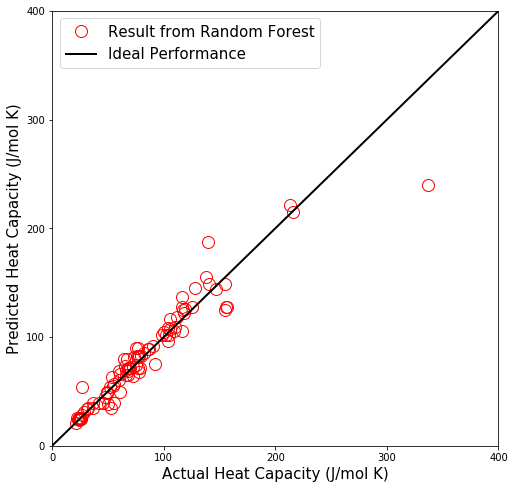

In [91]:
y_predict = rf.predict(X_test)

print('score:', rf.score(X_test, y_test))

plt.figure(1, figsize=(8, 8))
plt.plot(y_test, y_predict, 'ro', markersize=12, mfc='none')
plt.plot([0,1000],[0,1000], 'k', linewidth=2)
plt.xlabel('Actual Heat Capacity (J/mol K)', fontsize=15)
plt.ylabel('Predicted Heat Capacity (J/mol K)', fontsize=15)
plt.xlim((0, max(y_test)))
plt.ylim((0, max(y_test)))
ticks = np.linspace(0, 400, 5)
plt.xticks(ticks)
plt.yticks(ticks)
plt.legend(['Result from Random Forest','Ideal Performance'], loc='best', fontsize=15)

Great! It looks like this model does a pretty good job of predicting room temperature heat capacity!

## Summary ## 

You have now seen some of the minimum steps required to do basic machine learning. Before you go, lets quickly go over the steps we took one more time.

1. installed python and important useful packages
2. imported the heat capacity data and visualized it
3. created feature vectors and split the data into train and test sets
4. imported the random forest algorithm and fit a model to the training set 
5. predicted the performance of the test set, and compared it to the actual values

__I hope this was helpful! Again, feel free to email questions to me at kaaikauwe@gmail.com__